In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
os.getcwd()

'C:\\Users\\user\\workspace\\c11\\Python\\Notebooks\\gdp-and-internet-usage-Chris-Swann'

In [18]:
os.listdir("../../data/")

['gdp_percapita.csv', 'internet_use.csv', 'schools_clean.csv']

In [15]:
gdp_df = pd.read_csv('../../data/gdp_percapita.csv')

In [19]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [20]:
gdp_df.shape

(8219, 4)

In [21]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [14]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [15]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [16]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [19]:
total_years = gdp_df['Year'].nunique()

In [25]:
years_per_country = gdp_df.groupby('Country')['Year'].nunique()
years_per_country

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 247, dtype: int64

In [ ]:
complete_countries = years_per_country[years_per_country == total_years]

In [21]:
len(complete_countries)

228

In [23]:
complete_countries.index.tolist()

['Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czechia',
 "CÃ´te d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD)',
 'East Asia & Pacific (excluding high income)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Esw

In [28]:
missing_years = total_years - years_per_country
missing_years

Country
Afghanistan                    10
Africa Eastern and Southern     0
Africa Western and Central      0
Albania                         0
Algeria                         0
                               ..
Virgin Islands                 13
West Bank and Gaza              4
World                           0
Zambia                          0
Zimbabwe                        0
Name: Year, Length: 247, dtype: int64

In [29]:
countries_missing_many = missing_years.sort_values(ascending = False)

In [30]:
countries_missing_many.head(10)

Country
Djibouti                     23
Turks and Caicos Islands     21
Sint Maarten (Dutch part)    19
Kosovo                       18
Faroe Islands                18
Cayman Islands               16
Virgin Islands               13
CuraÃ§ao                     10
Afghanistan                  10
San Marino                    8
Name: Year, dtype: int64

In [34]:
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]["GDP_Per_Capita"]

(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

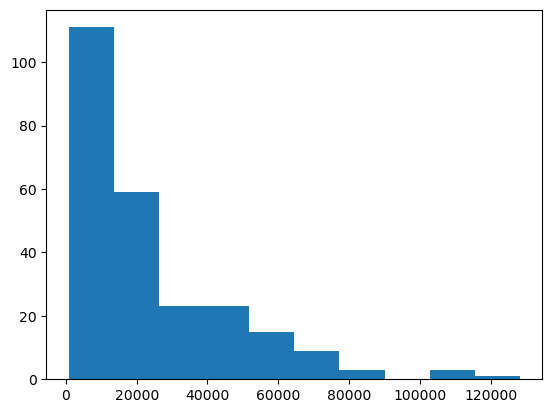

In [35]:
plt.hist(gdp_2020)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

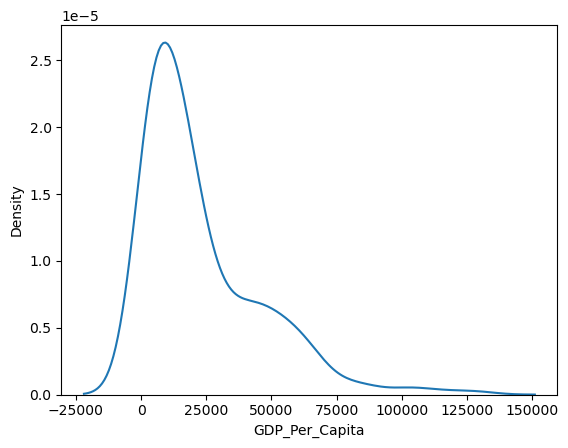

In [38]:
sns.kdeplot(gdp_2020)

{'whiskers': [<matplotlib.lines.Line2D at 0x16e43563110>,
 'caps': [<matplotlib.lines.Line2D at 0x16e43563390>,
 'boxes': [<matplotlib.lines.Line2D at 0x16e43562fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x16e43563610>],
 'fliers': [<matplotlib.lines.Line2D at 0x16e43563750>],
 'means': []}

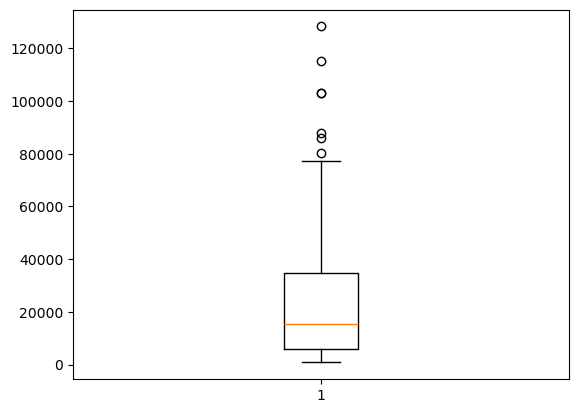

In [39]:
plt.boxplot(gdp_2020)

<Axes: ylabel='GDP_Per_Capita'>

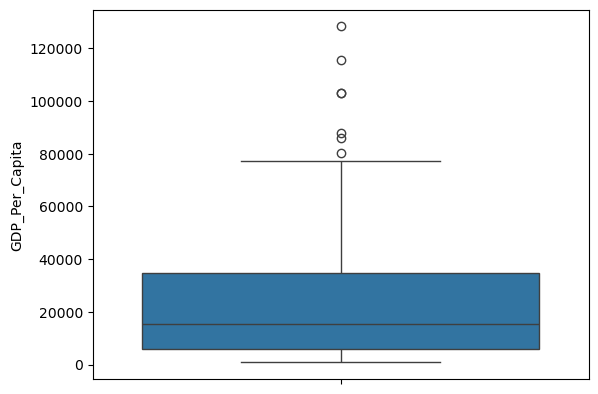

In [40]:
sns.boxplot(gdp_2020)

<Axes: ylabel='GDP_Per_Capita'>

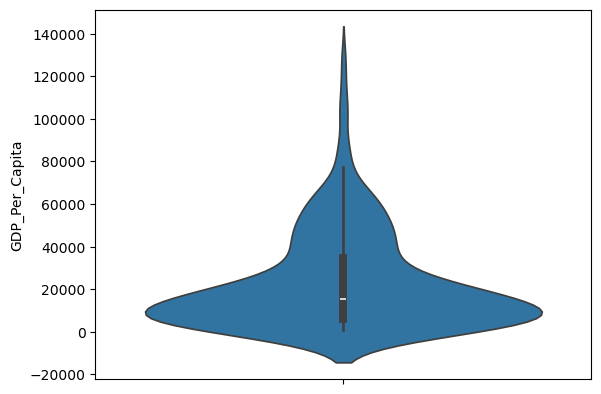

In [41]:
sns.violinplot(gdp_2020)

In [46]:
gdp_2020.median()

15309.23598817024

In [62]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

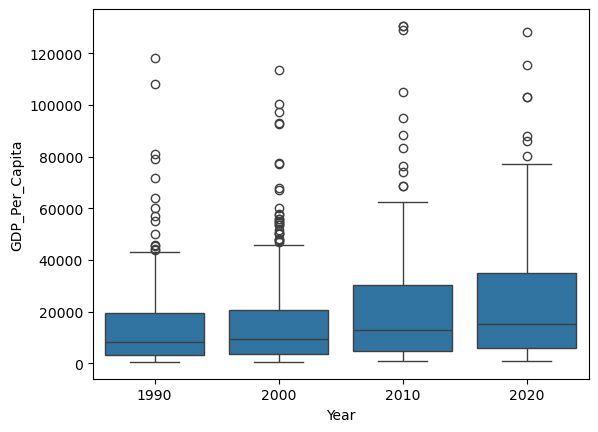

In [69]:
sns.boxplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)